> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDb movie Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb)


### Question(s) for Analysis
Below are the questions addressed in this analysis:

1. How the profit is affected by the revenue, budget, popularity, runtime.
2. Movie with the highest/lowest profit/budget/revenue.
3. Find the average budget/revenue/profit/runtime/popularity of all movies

In [1]:
#Import the neccesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.8MB/s eta 0:00:01  6% |██                              | 645kB 20.5MB/s eta 0:00:01    59% |███████████████████             | 6.2MB 28.4MB/s eta 0:00:01    72% |███████████████████████▏        | 7.6MB 27.9MB/s eta 0:00:01    98% |███████████████████████████████▌| 10.3MB 28.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.6MB/s eta 0:00:01  7% |██▌                             | 1.1MB 23.7MB/s eta 0:00:01    65% |████████████████████▉           | 8.7MB 26.9MB/s eta 0:00:01    74% |███████████████████████▉        | 10.0MB 25.0MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Find out the dimension of the dataframe-the numbers of rows and columns in the dataframe
df.shape

(10866, 21)

In [4]:
#Print the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#Get the statistics summary of the dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#Select relevant columns to use
df = df[['popularity', 'id', 'budget', 'revenue', 'runtime', 'original_title', 'release_year', 'budget_adj', 'revenue_adj', 'vote_count', 'vote_average']]
df.head()

,popularity,id,budget,revenue,runtime,original_title,release_year,budget_adj,revenue_adj,vote_count,vote_average
0,32.985763,135397,150000000,1513528810,124,Jurassic World,2015,1.379999e+08,1.392446e+09,5562,6.5
1,28.419936,76341,150000000,378436354,120,Mad Max: Fury Road,2015,1.379999e+08,3.481613e+08,6185,7.1
2,13.112507,262500,110000000,295238201,119,Insurgent,2015,1.012000e+08,2.716190e+08,2480,6.3
3,11.173104,140607,200000000,2068178225,136,Star Wars: The Force Awakens,2015,1.839999e+08,1.902723e+09,5292,7.5
4,9.335014,168259,190000000,1506249360,137,Furious 7,2015,1.747999e+08,1.385749e+09,2947,7.3


In [7]:
#Print the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
id                10866 non-null int64
budget            10866 non-null int64
revenue           10866 non-null int64
runtime           10866 non-null int64
original_title    10866 non-null object
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
vote_count        10866 non-null int64
vote_average      10866 non-null float64
dtypes: float64(4), int64(6), object(1)
memory usage: 933.9+ KB



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#check for null values
df.isnull().sum()

popularity        0
id                0
budget            0
revenue           0
runtime           0
original_title    0
release_year      0
budget_adj        0
revenue_adj       0
vote_count        0
vote_average      0
dtype: int64

In [9]:
#Create a new column, profit
df['profit'] = df['revenue'] - df['budget']
df.head()

,popularity,id,budget,revenue,runtime,original_title,release_year,budget_adj,revenue_adj,vote_count,vote_average,profit
0,32.985763,135397,150000000,1513528810,124,Jurassic World,2015,1.379999e+08,1.392446e+09,5562,6.5,1363528810
1,28.419936,76341,150000000,378436354,120,Mad Max: Fury Road,2015,1.379999e+08,3.481613e+08,6185,7.1,228436354
2,13.112507,262500,110000000,295238201,119,Insurgent,2015,1.012000e+08,2.716190e+08,2480,6.3,185238201
3,11.173104,140607,200000000,2068178225,136,Star Wars: The Force Awakens,2015,1.839999e+08,1.902723e+09,5292,7.5,1868178225
4,9.335014,168259,190000000,1506249360,137,Furious 7,2015,1.747999e+08,1.385749e+09,2947,7.3,1316249360


In [10]:
#Drop any available duplicates in the dataset
df.drop_duplicates()

,popularity,id,budget,revenue,runtime,original_title,release_year,budget_adj,revenue_adj,vote_count,vote_average,profit
0,32.985763,135397,150000000,1513528810,124,Jurassic World,2015,1.379999e+08,1.392446e+09,5562,6.5,1363528810
1,28.419936,76341,150000000,378436354,120,Mad Max: Fury Road,2015,1.379999e+08,3.481613e+08,6185,7.1,228436354
2,13.112507,262500,110000000,295238201,119,Insurgent,2015,1.012000e+08,2.716190e+08,2480,6.3,185238201
3,11.173104,140607,200000000,2068178225,136,Star Wars: The Force Awakens,2015,1.839999e+08,1.902723e+09,5292,7.5,1868178225
4,9.335014,168259,190000000,1506249360,137,Furious 7,2015,1.747999e+08,1.385749e+09,2947,7.3,1316249360
5,9.110700,281957,135000000,532950503,156,The Revenant,2015,1.241999e+08,4.903142e+08,3929,7.2,397950503
6,8.654359,87101,155000000,440603537,125,Terminator Genisys,2015,1.425999e+08,4.053551e+08,2598,5.8,285603537
7,7.667400,286217,108000000,595380321,141,The Martian,2015,9.935996e+07,5.477497e+08,4572,7.6,487380321
8,7.404165,211672,74000000,1156730962,91,Minions,2015,6.807997e+07,1.064192e+09,2893,6.5,1082730962
9,6.326804,150540,175000000,853708609,94,Inside Out,2015,1.609999e+08,7.854116e+08,3935,8.0,678708609


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (How the profit is affected by the revenue, budget, popularity, runtime)

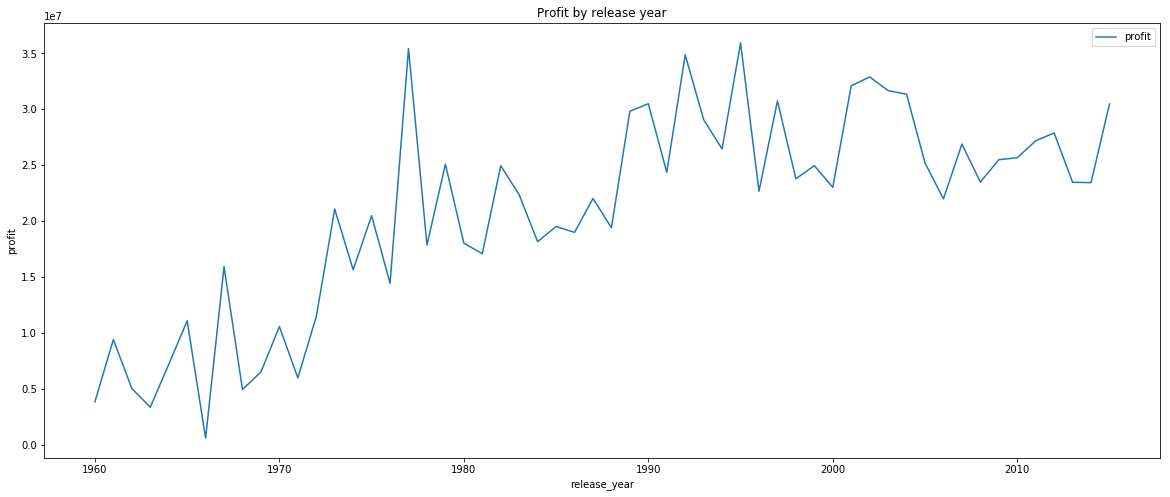

In [11]:
#A line plot of the profit and release year
release_yr_rev = (df[df['profit'].notnull()][['release_year', 'profit']].groupby('release_year').mean())
release_yr_rev.plot(figsize=(20,8))
plt.xlabel('release_year')
plt.ylabel('profit')
plt.title('Profit by release year')
plt.show()


This plot shows that the movie with the highest profit was released around the year 1980 while the movie with the lowest profit was released between 1960 and 1970.

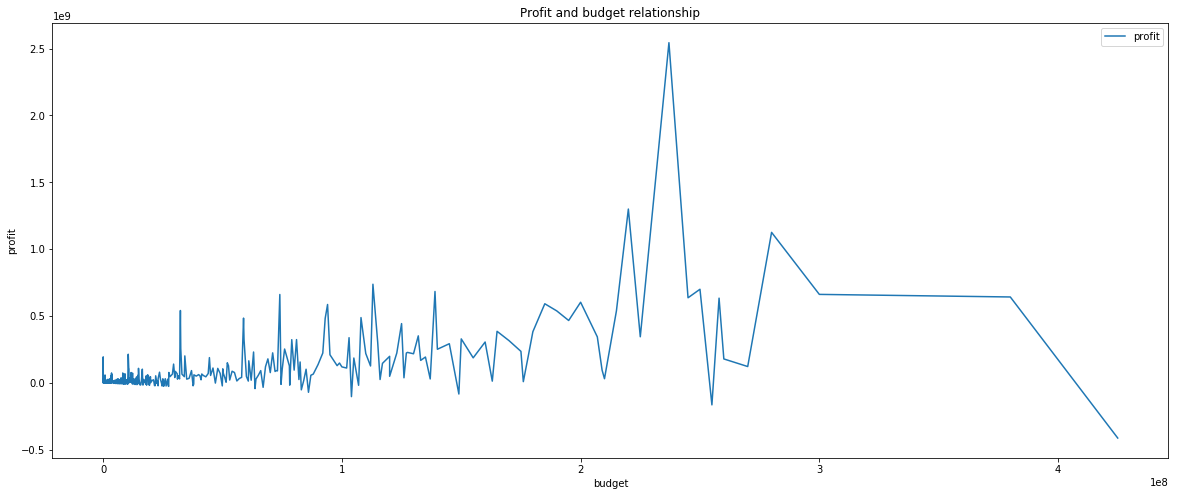

In [12]:
#A line plot of the profit and budget
budget_rev = (df[df['profit'].notnull()][['budget', 'profit']].groupby('budget').mean())
budget_rev.plot(figsize=(20,8))
plt.xlabel('budget')
plt.ylabel('profit')
plt.title('Profit and budget relationship')
plt.show()

This plot indicates that the movie with the highest profit has a budget of 237000000.
Also, it can be deduced that at a budget of 425000000 the movie recorded the least profit.

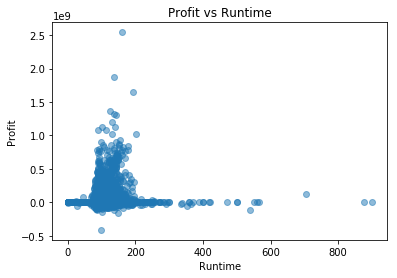

In [13]:
#Relationship between Profit and Runtime
plt.xlabel('Runtime')
plt.ylabel('Profit')
plt.title('Profit vs Runtime')
plt.scatter(df['runtime'], df['profit'], alpha=0.5)
plt.show()

This plot indicates that movies with a runtime of about 200 minutes generated the highest profit

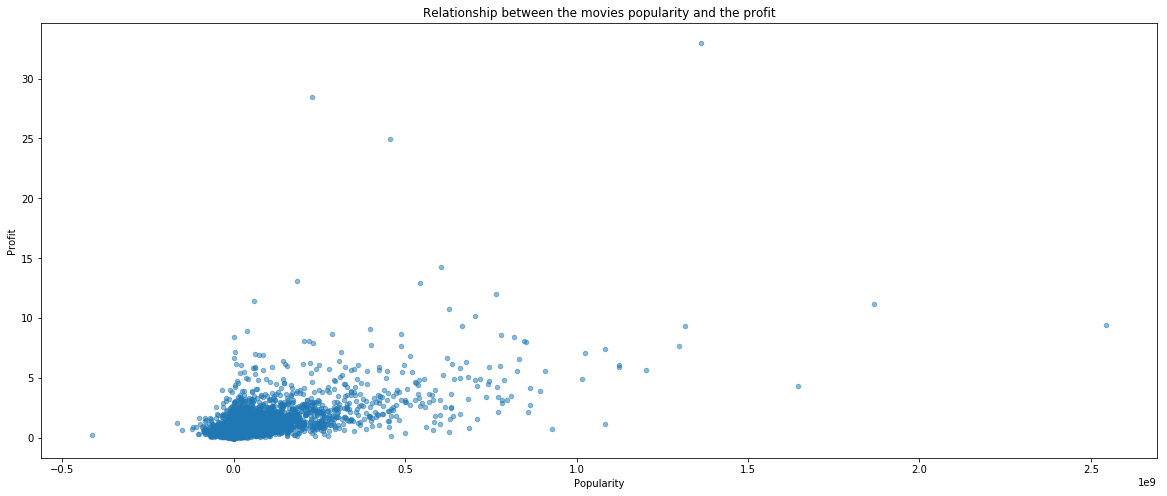

In [14]:
#Investigate the relationship between the movies popularity and the profit.
df.plot(x='profit', y='popularity', kind='scatter', figsize=(20,8), alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Profit')
plt.title('Relationship between the movies popularity and the profit')
plt.show()

This plot indicates that majority of the movies have low popularity and the most profitable of them has a popularity of 1.5

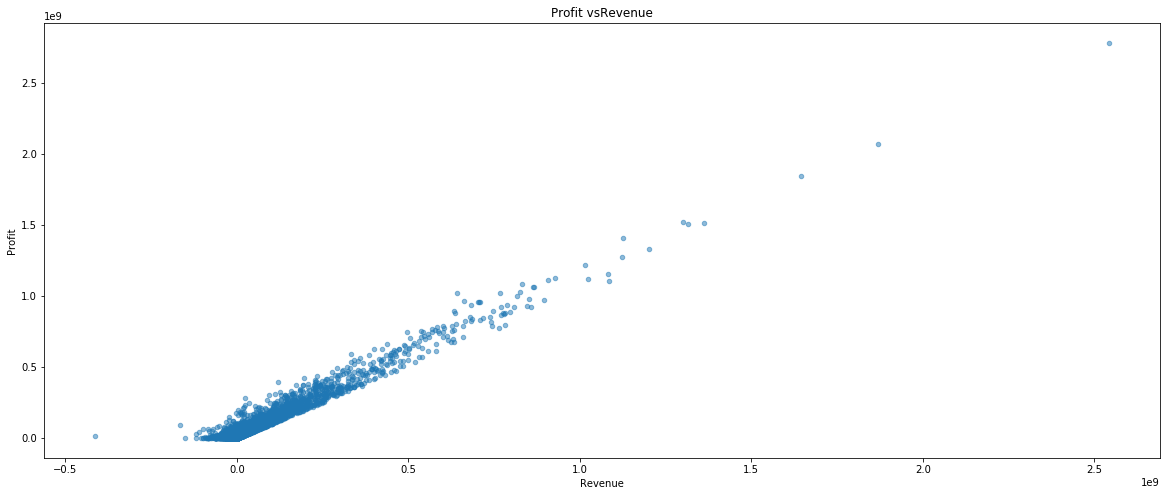

In [15]:
#Relationship between Profit and Revenue
df.plot(x='profit', y='revenue', kind='scatter', figsize=(20,8), alpha=0.5)
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.title('Profit vsRevenue')
plt.show()

This plot shows a strong relationship between the revenue generated and profit earned. Most of the movies generated low revenue which also indicates a low profit. 

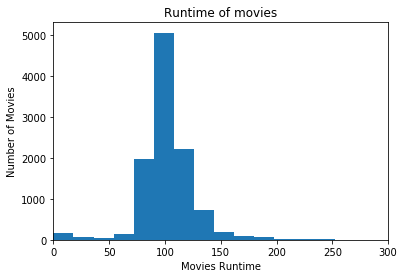

In [16]:
#Runtime of movies
plt.xlabel('Movies Runtime')
plt.ylabel('Number of Movies')
plt.title('Runtime of movies')
plt.hist(df['runtime'], bins = 50);
plt.xlim(0, 300);

This plot shows that most movies have a runtime of about 100 minutes

### Research Question 2 (Movie with the highest/lowest profit/budget/revenue!)

In [17]:
# Function to find maximum value of a column
def max(column):
    return df.loc[df[column].idxmax()]


In [18]:
#Movie with highest profit
max('profit')

popularity            9.43277
id                      19995
budget              237000000
revenue            2781505847
runtime                   162
original_title         Avatar
release_year             2009
budget_adj        2.40887e+08
revenue_adj       2.82712e+09
vote_count               8458
vote_average              7.1
profit             2544505847
Name: 1386, dtype: object

In [19]:
#Movie with highest revenue
max('revenue')

popularity            9.43277
id                      19995
budget              237000000
revenue            2781505847
runtime                   162
original_title         Avatar
release_year             2009
budget_adj        2.40887e+08
revenue_adj       2.82712e+09
vote_count               8458
vote_average              7.1
profit             2544505847
Name: 1386, dtype: object

In [20]:
#Movie with highest budget
max('budget')

popularity                  0.25054
id                            46528
budget                    425000000
revenue                    11087569
runtime                         100
original_title    The Warrior's Way
release_year                   2010
budget_adj                 4.25e+08
revenue_adj             1.10876e+07
vote_count                       74
vote_average                    6.4
profit                   -413912431
Name: 2244, dtype: object

In [21]:
# Function to find minimum value of a column
def min(column):
    return df.loc[df[column].idxmin()]

In [22]:
#Movie with lowest profit
min('profit')

popularity                  0.25054
id                            46528
budget                    425000000
revenue                    11087569
runtime                         100
original_title    The Warrior's Way
release_year                   2010
budget_adj                 4.25e+08
revenue_adj             1.10876e+07
vote_count                       74
vote_average                    6.4
profit                   -413912431
Name: 2244, dtype: object

In [23]:
#Movie with lowest revenue
min('revenue')

popularity          2.93234
id                   265208
budget             30000000
revenue                   0
runtime                  92
original_title    Wild Card
release_year           2015
budget_adj         2.76e+07
revenue_adj               0
vote_count              481
vote_average            5.3
profit            -30000000
Name: 48, dtype: object

In [24]:
#Movie with lowest budget
min('budget')

popularity            3.92733
id                     280996
budget                      0
revenue              29355203
runtime                   103
original_title     Mr. Holmes
release_year             2015
budget_adj                  0
revenue_adj       2.70068e+07
vote_count                425
vote_average              6.4
profit               29355203
Name: 30, dtype: object

### Research Question 3  (Find the average budget/revenue/profit/runtime/popularity of all movies)

In [25]:
# Function to find average of a column
def average(column):
    return df[column].mean()

In [26]:
#Find the average budget of all movies
average('budget')

14625701.094146879

In [27]:
#Find the average revenue of all movies
average('revenue')

39823319.793392234

In [28]:
#Find the average profit of all movies
average('profit')

25197618.699245352

In [29]:
#Find the average runtime of all movies
average('runtime')

102.07086324314375

In [30]:
#Find the average popularity of all movies
average('popularity')

0.64644095196024287

<a id='conclusions'></a>
## Conclusions
1. Movies around 200 minutes are more profitable.
2. Most movies have a runtime of 100 minutes.
3. There is a steady increase in profit over the years.
4. There is a strong relationship between profit and revenue.
5. Avatar has the highest profit and revenue.
6. The warriors way has the highest budget and the lowest profit.
7. Wild Card has the lowest revenue.
8. Mr Holmes has the lowest budget.
9. Average budget of all movies is 14,625,701.
10. Average revenue ofall moviesis 39,823,320.
11. Average profit of all movies is $25,197,619.
12. Average runtime of all movies is 102 minutes.
13. Average popularity of all movies is 0.65

Limitation: I left out some columns that could have an effect on the conclusion during the analysis.

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255